#**Employees Turnover Prediction**



#### **Objectives:**




*   Determine which factors had a high contribute to employees turnover rate.
*   Create a model that can predict whether an employee will leave the company or not.


---


####**Import libraries:**


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Ignore warning messages:
import warnings
warnings.filterwarnings('ignore')

####**Reading Data:**

In [75]:
df = pd.read_csv("https://github.com/AbeerAlghamdi1/Dataset/raw/main/Employee_Turnover_Prediction.csv")

# Showing the first 5 rows of data:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [76]:
# Rename columns to read it easily:
df = df.rename(columns={'satisfaction_level': 'SatisfactionRate', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'MonthlyHoursAverage',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'left': 'TurnedOver',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'salary': 'Salary'  
                        })


#### **Target Feature**


---



The **'TurnedOver'** feature is the **Target** feature.

*    **0** for employees who didn't turned over.
*    **1** for employees who turned over.








## **Exploratory Data Analysis (EDA):**

### **Data preprocessing**

In [77]:
# Showing 5 samples of data:
df.sample(5)

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion,Department,Salary
14508,0.40,0.52,2,147,3,0,1,0,product_mng,medium
9560,0.72,0.50,3,205,3,1,0,0,sales,low
9348,0.63,0.93,4,238,2,0,0,0,technical,low
12085,0.11,0.87,6,305,4,0,1,0,marketing,low
5705,0.90,0.58,5,260,2,0,0,0,support,medium


In [78]:
# Showing the number of rows and columns in data:
df.shape

(14999, 10)

In [79]:
# Description of data:
df.describe()

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [80]:
# Catgorical column describtion: 
df.describe(exclude=[np.number])

,Department,Salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [81]:
# Data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SatisfactionRate     14999 non-null  float64
 1   Evaluation           14999 non-null  float64
 2   ProjectCount         14999 non-null  int64  
 3   MonthlyHoursAverage  14999 non-null  int64  
 4   YearsAtCompany       14999 non-null  int64  
 5   WorkAccident         14999 non-null  int64  
 6   TurnedOver           14999 non-null  int64  
 7   Promotion            14999 non-null  int64  
 8   Department           14999 non-null  object 
 9   Salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [82]:
# Showing missing data:
df.isnull().sum()

SatisfactionRate       0
Evaluation             0
ProjectCount           0
MonthlyHoursAverage    0
YearsAtCompany         0
WorkAccident           0
TurnedOver             0
Promotion              0
Department             0
Salary                 0
dtype: int64

In [83]:
# Calculate duplicate values:
df.duplicated().sum()

3008

In [84]:
# Remove duplicate values:
df.drop_duplicates(inplace=True)

In [85]:
# Data shape after removing duplicate values:
df.shape

(11991, 10)

##### Statistical Overview

In [86]:
# Calculate Turnover Rate:
turnover_rate = df.TurnedOver.value_counts() / 11991
turnover_rate

0    0.833959
1    0.166041
Name: TurnedOver, dtype: float64

 **Result:** 83% of employees stayed and 17% of employees Turned over. 

In [87]:
# Overview of summary ( Not-TurnedOver V.S. TurnedOver)
turnover_Summary = df.groupby('TurnedOver')
turnover_Summary.mean()

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,Promotion
TurnedOver,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


### **Visualization** 

##### Overview Of Turnover Rate:

In [88]:
# Assigning values, label, and color of pie plot:
labels = ['Not TurnedOver', 'TurnedOver']
values = df.TurnedOver.value_counts()
colors = [ '#fc7c74','#a4ac9c']

# Creating  the figure using plotly pie:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[ 0.1, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=.6)))

# Adding style to the figure:
fig.update_layout(
    title_text="Overview Of Turnover Rate",
    autosize=False,
    legend_bordercolor='Gray',
    legend_borderwidth=.7,
    width=600,
    height=500)

fig.show()

**83% of employees stayed and 17% of employees left the company.**

#####Employees Satisfaction Rate By Turnover

In [89]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="SatisfactionRate", color="TurnedOver", barmode='overlay',
             title="Employees Satisfaction Rate By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Employees who had a satisfaction rate 0.5 or less tend to leave the company more.**

##### Employees Evaluation By Turnover

In [90]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="Evaluation", color="TurnedOver", barmode='overlay',
             title=" Employees Evaluation By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Employees with low and high evaluation scores tend to leave the company.**




##### Employees Projects Count By Turnover

In [91]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="ProjectCount", color="TurnedOver", barmode='group',
             title="Employees Projects Count By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))     
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Most of the employees did from 3-5 projects.**

##### Employees Average Monthly Hours By Turnover

In [92]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="MonthlyHoursAverage", color="TurnedOver", barmode='stack',
             title="Employees Average Monthly Hours By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**The average monthly work hours of employees who left the company is more than that of the employees who stayed.**

#####Years Employees Spent At Company By Turnover

In [93]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="YearsAtCompany", color="TurnedOver", barmode='group',
             title="Years Employees Spent At Company By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Most of the employees had experiences between 2-4 years at the company.**

##### Employees Work Accidents By Turneover

In [94]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="WorkAccident", color="TurnedOver", barmode='group',
             title="Employees Work Accidents By Turneover ", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.**

##### Employees Promotions By Turnover

In [95]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="Promotion", color="TurnedOver", barmode='group',
             title="Employees Promotions By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Most of those left didn't get the promotion in the previous 5 years.**

##### Employees Departments By Turnover

In [96]:
# Creating  the figure using plotly histogram:
fig=px.histogram(df, x="Department", color="TurnedOver", barmode='group',
             title=" Employees Departments By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**The sales department is having the highest numbers of turned-over employees followed by technical and support.**

##### Employees Salaries By Turnover

In [97]:
# Creating the figure using plotly histogram:
fig=px.histogram(df, x="Salary", color="TurnedOver", barmode='group',
             title="Employees Salaries By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

# Function to assign legend title items names:
for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed",
                  legend_bordercolor='Gray',
                  legend_borderwidth=.7)

fig.show()

**Employees with low to average salaries tend to leave the company.**

##### Correlation Matrix

In [98]:
# Displaying correlation matrix using heatmap:
plt.figure(figsize=(12,8))
corr = df.corr()
corr.style.background_gradient(cmap='Reds')


,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion
SatisfactionRate,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
Evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
ProjectCount,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
MonthlyHoursAverage,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
YearsAtCompany,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
WorkAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
TurnedOver,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
Promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Figure size 864x576 with 0 Axes>

### **Data Preparation**

##### 1.Convert Categorical Data 

In [99]:
# Convert categorical variable to dummy variables:
df= pd.get_dummies(df, columns=['Department','Salary' ])

#### 2.Train Test Split

In [100]:
# import train_test_split:
from sklearn.model_selection import train_test_split

# Select split parameter:
X = df.drop(['TurnedOver'], axis=1)
y = df.TurnedOver

In [101]:
# Splitting into train and test sets for both parameters:
X_train, X_test ,y_train , y_test = train_test_split(X,y, train_size=0.75, random_state= 42)

## **Modeling:**

#### 1.Baseline Model

In [102]:
# Function to create baseline model:
def baseline_model(n_predictions, value_to_predict):

# list to save all the predicted values:
 baseline_preds = []
 
 for i in range(n_predictions): # loop through training set size
  baseline_preds.append(value_to_predict) # predict the most common values for rows and store it in list
 return pd.Series(baseline_preds) # return the predictions list as series

In [103]:
# Number of predictions:
n_predictions = len(y_test)
n_predictions

2998

In [104]:
# The most common class:
y_train.value_counts()

0    7499
1    1494
Name: TurnedOver, dtype: int64

In [105]:
# Which value to predict: (classification = most common class (0 = Not TurnedOver)
baseline_value = y_train.value_counts().index[0] 
baseline_value 

0

In [106]:
# Print all predicted values:
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds 

0       0
1       0
2       0
3       0
4       0
       ..
2993    0
2994    0
2995    0
2996    0
2997    0
Length: 2998, dtype: int64

##### Baseline - Accuracy

In [107]:
# Import accuracy score:
from sklearn.metrics import accuracy_score

# Showing the Accuracy:
acc_base = accuracy_score(y_test , baseline_preds)
acc_base

0.8342228152101401

##### Baseline - Classification Report

In [108]:
# Import classification report:
from sklearn.metrics import classification_report

# Displaying classification report:
print(classification_report(y_test, baseline_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2501
           1       0.00      0.00      0.00       497

    accuracy                           0.83      2998
   macro avg       0.42      0.50      0.45      2998
weighted avg       0.70      0.83      0.76      2998



##### Baseline - Confusion Matrix

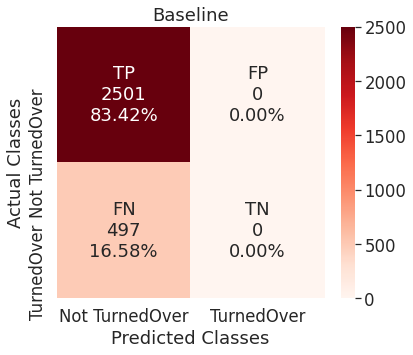

In [109]:
# Import confusion matrix:
from sklearn.metrics import confusion_matrix

# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 2.Logistic Regression

In [110]:
# Import Logistic Regression:
from sklearn.linear_model import LogisticRegression

# Building the model:
lr = LogisticRegression(random_state=42)

# Fit the model on training data:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
# Predict the testing data:
lr_preds = lr.predict(X_test)
lr_preds

array([1, 0, 0, ..., 0, 0, 0])

##### LR - Accuracy

In [112]:
# Showing the Accuracy:
acc_lr = accuracy_score(y_test , lr_preds)
acc_lr

0.8305537024683122

##### LR - Classification Report

In [113]:
# Displaying classification report:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2501
           1       0.47      0.16      0.24       497

    accuracy                           0.83      2998
   macro avg       0.66      0.56      0.57      2998
weighted avg       0.79      0.83      0.79      2998



##### LR - Confusion Matrix

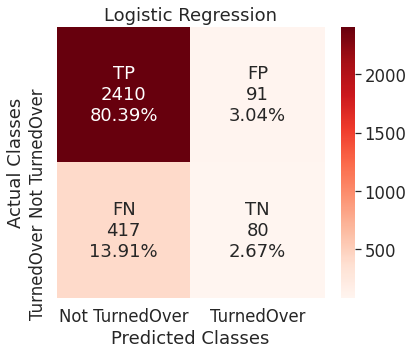

In [114]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 3.KNeighbors Classifier

In [115]:
# Import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Building the model:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on training data:
knn = knn.fit(X_train, y_train)

In [116]:
# Predict the testing data:
knn_preds = knn.predict(X_test)
knn_preds

array([1, 0, 0, ..., 0, 0, 0])

##### KNN - Accuracy

In [117]:
# Showing the Accuracy:
knn_acc = accuracy_score(y_test, knn_preds)
knn_acc

0.9439626417611742

##### KNN - Classification Report

In [118]:
# Displaying classification report:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2501
           1       0.81      0.87      0.84       497

    accuracy                           0.94      2998
   macro avg       0.89      0.91      0.90      2998
weighted avg       0.95      0.94      0.94      2998



##### KNN - Confusion Matrix

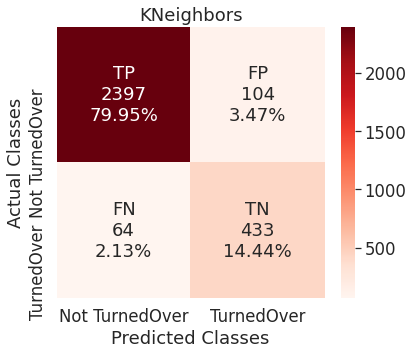

In [119]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, knn_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 4.Random Forest Classifier

In [147]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building the model:
rf = RandomForestClassifier(random_state=42)

# Fit the model on training data:
rf = rf.fit(X_train, y_train)

In [148]:
# Predict the testing data:
rf_preds= rf.predict(X_test)
rf_preds

array([1, 0, 0, ..., 0, 0, 0])

##### RF - Accuracy

In [149]:
# Showing the Accuracy:
acc_rf = accuracy_score(y_test , rf_preds)
acc_rf

0.9803202134756505

##### RF - Classification Report

In [123]:
# Displaying classification report:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.90      0.94       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



##### RF - Confusion Matrix

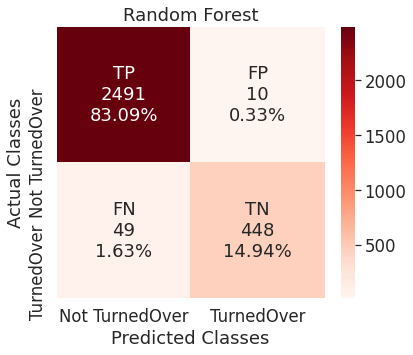

In [124]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#####**Result:** 



---

As we see above, Random Forest Classifier has the highest accuracy score for predicting employee turnover data,  So we will optimize the Random Forest Classifier to get the best accuracy score using GridSearchCV and  RandomizedSearchCV hyperparameters.


## **Model Tuning**

#### Build Random Forest Classifier with hyperparameters

In [125]:
# Create the param grid
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': [.3, .5],
    'max_depth' : [7,10],
    'bootstrap': [False, True]
}

#### Random Forest - GridSearchCV

In [126]:
# Random Forest Model back to standard:
rf = RandomForestClassifier(random_state=42)

In [127]:
# Import GridSearchCV:
from sklearn.model_selection import GridSearchCV

# Building the model:
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 10)

In [128]:
# Fit the GridSearchCV:
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   52.7s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  5.9min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  9.1min finished


In [129]:
# Showing the best parameters:
grid_result.best_params_

{'bootstrap': False, 'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200}

In [130]:
# Appling the best parameters to Random Forest model:
rf_grid = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = .5, n_estimators = 200,random_state=42)

# Fit the model on training data:
rf_grid = rf_grid.fit(X_train, y_train)

In [131]:
# Predict the testing data:
rf_grid_preds= rf_grid.predict(X_test)
rf_grid_preds

array([1, 0, 0, ..., 0, 0, 0])

##### RF_Grid - Accuracy

In [132]:
# Showing the Accuracy:
acc_rf_grid = accuracy_score(y_test , rf_grid_preds)
acc_rf_grid

0.9829886591060707

##### RF_Grid - Classification Report

In [133]:
# Displaying classification_report:
print(classification_report(y_test, rf_grid_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.91      0.95       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



##### RF_Grid - Confusion Matrix

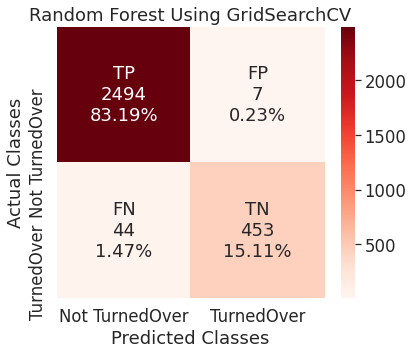

In [134]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_grid_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using GridSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### Random Forest - RandomizedSearchCV

In [135]:
# Random Forest Model back to standard:
rf = RandomForestClassifier(random_state=42)

In [136]:
# Import RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

# Building the model:
Randomize = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [156]:
# Fit the GridSearchCV:
Rendom = Randomize.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  4.1min finished


In [157]:
# Showing the best parameters:
Rendom.best_params_

{'bootstrap': False, 'max_depth': 10, 'max_features': 0.5, 'n_estimators': 300}

In [158]:
# Displaying the predictions
rf_Randomize = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = .5, n_estimators = 300,random_state=42)

# Fit the model on training data:
rf_Randomize = rf_Randomize.fit(X_train, y_train)

In [159]:
# Predict the testing data:
rf_rand_preds= rf_Randomize.predict(X_test)
rf_rand_preds

array([1, 0, 0, ..., 0, 0, 0])

##### RF_Randomize - Accuracy

In [161]:
# Showing the Accuracy:
acc_rf_rand = accuracy_score(y_test , rf_rand_preds)
acc_rf_rand

0.9829886591060707

##### RF_Randomize - Classification Report

In [162]:
# Displaying classification_report:
print(classification_report(y_test, rf_rand_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.91      0.95       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



##### RF_Randomize - Confusion Matrix

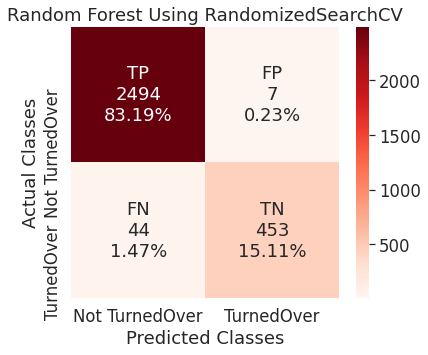

In [163]:
# Assigning values of confusion matrix:
cf = confusion_matrix(y_test, rf_rand_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

# Plot confusion matrix using heatmap:
plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using RandomizedSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## **Compare Results**

### **Accuracy Scores Plot**

In [164]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['Model'] = ['Baseline','Logistic' , 'KNN' ,'Random Forest','RF_Grid','RF_Randomize']
accuracies['values'] = [acc_base , acc_lr , knn_acc , acc_rf, acc_rf_grid , acc_rf_rand]

In [165]:
# Visualize accuracies results:
fig = px.bar(accuracies, x="Model", y="values",color='Model',width=700, height=400,
             hover_name=['Baseline','Logistic' , 'KNN' ,'Random Forest','RF_Grid','RF_Randomize'],
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r,
             title="Comparing Models Accuracy")

# Removing ( Model=) from the legend items name:
for trace in fig.data:
    trace.name = trace.name.split('=')[1]

# Adding style to the figure:
fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_xaxes(title_text='Model Name')
fig.update_yaxes(title_text='Accuracy Result')
fig.show()

###**Roc Curve**

In [166]:
# Imprt ROC curve, ROc and AUC score:
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities:
lr_prob= lr.predict_proba(X_test)[:,1]
knn_prob= knn.predict_proba(X_test)[:,1]
rf_prob= rf.predict_proba(X_test)[:,1]
rf_grid_prob=rf_grid.predict_proba(X_test)[:,1]
rf_Randomize_prob=rf_Randomize.predict_proba(X_test)[:,1]

# Compute false postive rate, and True positive rate:
lr_fpr, lr_tpr, lr_ = roc_curve(y_test,lr_prob)
knn_fpr, knn_tpr, knn_ = roc_curve(y_test,knn_prob)
rf_fpr, rf_tpr, rf_ = roc_curve(y_test,rf_prob)
rf_grid_fpr, rf_grid_tpr, rf_grid_ = roc_curve(y_test,rf_grid_prob)
rf_Randomize_fpr, rf_Randomize_tpr, rf_Randomize_ = roc_curve(y_test,rf_Randomize_prob)

# Calculate area under the curve to display on the plot:
lr_auc = roc_auc_score(y_test,lr_prob)
knn_auc = roc_auc_score(y_test,knn_prob)
rf_auc = roc_auc_score(y_test,rf_prob)
rf_grid_auc = roc_auc_score(y_test,rf_grid_prob)
rf_Randomize_auc = roc_auc_score(y_test,rf_Randomize_prob)

# Plot the computed values:
fig= go.Figure()
fig.add_shape(
    type= 'line', line= dict(dash= 'dash'),
    x0=0, x1=1, y0=0, y1=1)
fig.add_trace(go.Scatter(x=lr_fpr, y=lr_tpr, name='Logistic Regression: (AUC = %0.2f)' % lr_auc,mode='lines'))
fig.add_trace(go.Scatter(x=knn_fpr, y=knn_tpr, name='KNeighbors: (AUC = %0.2f)' % knn_auc,mode='lines'))
fig.add_trace(go.Scatter(x=rf_fpr, y=rf_tpr, name='Random Forest: (AUC = %0.2f)' % rf_auc,mode='lines'))
fig.add_trace(go.Scatter(x=rf_grid_fpr, y=rf_grid_tpr, name='RF-GridSearchCV: (AUC = %0.2f)' % rf_grid_auc,mode='lines'))
fig.add_trace(go.Scatter(x=rf_Randomize_fpr, y=rf_Randomize_tpr, name='RF-RandomizedSearchCV: (AUC = %0.2f)' % rf_Randomize_auc,mode='lines'))

# Custom settings for the plot:
fig.update_layout(
    title_text='ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    legend_bordercolor='Gray',
    legend_borderwidth=.7,
    width=700, height=500)

fig.show()

# **Conclusion:**

**Followed Steps:**
1. Data Preparation
  *  Changed every features names to make it more readable.
  *  Changed categorical variable to dummy variables.
  *  Splitted the Data Train 75% and test 25%, and random state values is 42.

2. Modeling 
  1. **Baseline Model** 
    * The values predicted for each observation was the most common value in the train set (which was Not TurnedOver).
    * The model scored 83%.
  
  2. **Logistic Regression**
    * The model scored 83%.
   
  3. **k-Nearest Neighbors**
    * The model scored 94%.

  4. **Random Forest**
    * The model scored 98.03% before tuning.
    * The model scored 98.29% after tuning with GridSearchCV and RandomizedSearchCV.
     
**To Conclude:**
*  The Random Forest Classifier model with GridSearchCV and RandomizedSearchCV hyperparameters got the highest accuracy scores in predicting the Employees Turnover Rate.